In [1]:
%load_ext watermark
%watermark

2019-05-22T11:41:20+02:00

CPython 3.6.8
IPython 6.2.1

compiler   : GCC 7.3.0
system     : Linux
release    : 4.13.0-46-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit


## Carga DataFrame

In [43]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
warnings.filterwarnings('ignore')

In [3]:
df_N_ES = pd.read_pickle('../Data/02.-Untitled.pkl')

df_N_ES.head()

,ds,y
0,2017-05-02,1993
1,2017-05-03,3193
2,2017-05-04,2759
3,2017-05-05,2503
4,2017-05-06,56


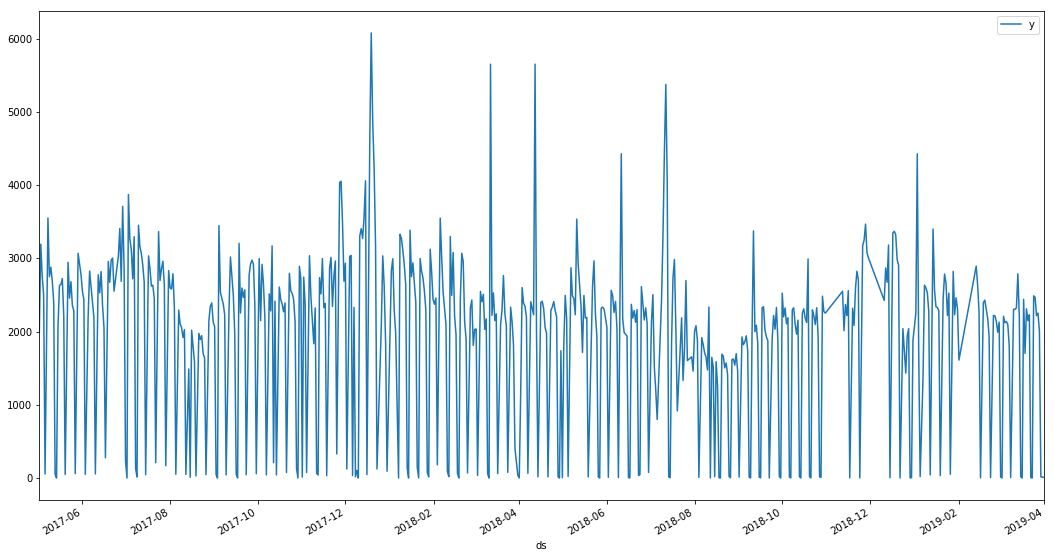

In [32]:
df_N_ES.plot.line(x = 'ds',y = 'y');

## Prophet 

In [4]:
df_N_ES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 2 columns):
ds    599 non-null datetime64[ns]
y     599 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.4 KB


In [5]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [44]:
f = Prophet()

f.add_country_holidays(country_name = 'ES')

f.fit(df_N_ES)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
len(df_N_ES)

599

In [46]:
df_forecast = f.make_future_dataframe(periods = 120)

df_forecast.head()

,ds
0,2017-05-02
1,2017-05-03
2,2017-05-04
3,2017-05-05
4,2017-05-06


In [47]:
df_forecast.tail()

,ds
714,2019-07-26
715,2019-07-27
716,2019-07-28
717,2019-07-29
718,2019-07-30


In [48]:
len(df_N_ES)

599

In [49]:
len(df_forecast)

719

In [50]:
forecast = f.predict(df_forecast)

In [51]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Asunción de la Virgen,Asunción de la Virgen_lower,Asunción de la Virgen_upper,Año nuevo,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-02,1965.982738,1973.772614,3381.310249,1965.982738,1965.982738,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,745.497886,745.497886,745.497886,0.0,0.0,0.0,2711.480624
1,2017-05-03,1965.717973,1982.130309,3394.491871,1965.717973,1965.717973,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,745.662198,745.662198,745.662198,0.0,0.0,0.0,2711.380171
2,2017-05-04,1965.453209,1913.594556,3340.596093,1965.453209,1965.453209,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,649.117710,649.117710,649.117710,0.0,0.0,0.0,2614.570918
3,2017-05-05,1965.188444,1693.191008,3173.374662,1965.188444,1965.188444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,469.697798,469.697798,469.697798,0.0,0.0,0.0,2434.886242
4,2017-05-06,1964.923679,-422.735385,973.866946,1964.923679,1964.923679,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1670.787579,-1670.787579,-1670.787579,0.0,0.0,0.0,294.136099


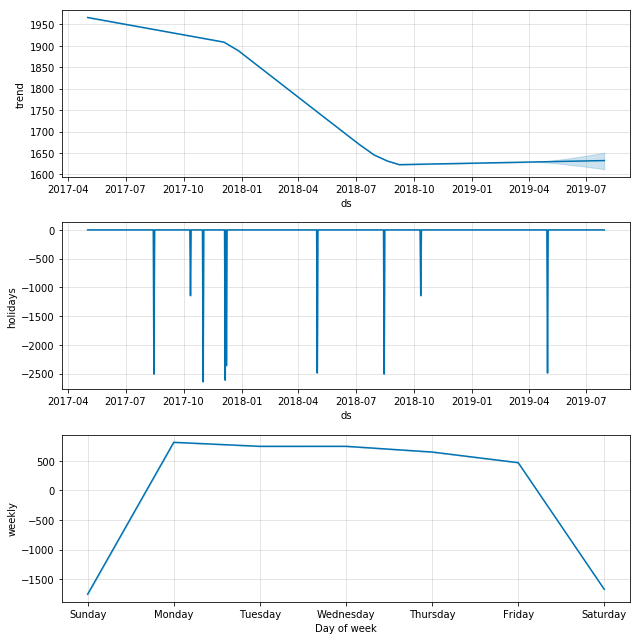

In [52]:
f.plot_components(forecast);

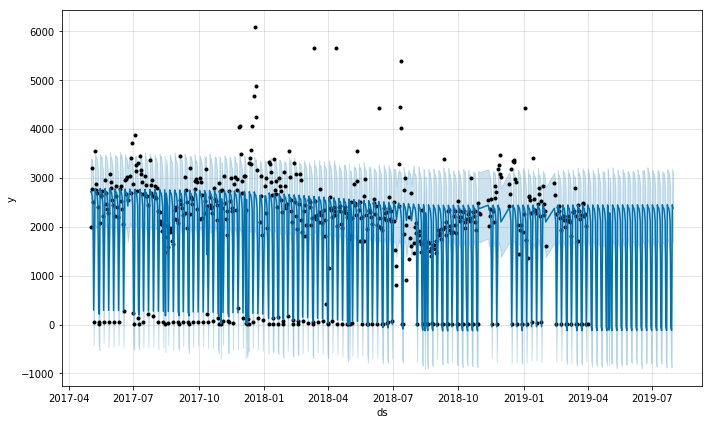

In [53]:
f.plot(forecast);